## Data Gathering

Dataset I used originally from https://universe.roboflow.com/uttam-ubpdc/apllecounting2-fppyk-obt8f contain with different color of Apple.

1. In the project folder ```apple-classification```, create dataset folder
    ```bash
    mkdir dataset
    ```
2. Download the dataset
 
    ```bash
    !curl -L "https://universe.roboflow.com/ds/JVKquPWr8c?key=xC8w7Rxzla" > roboflow.zip;
    ```
3. Extract the data into ```dataset``` folder and make sure it looks like this:
```bash
    dataset/
    ├── train/
    │   ├── images/
    │   ├── labels/
    ├── valid/
    │   ├── images/
    │   ├── labels/
    ├── test/
    │   ├── images/
    │   ├── labels/
    └── data.yaml
```
4. I used image provided in the test as sample https://storage.googleapis.com/648010c1-f244-4641-98f2-73ff6c1b4e99/ai_assignment_20230726_classify.jpeg

In [1]:
!curl -L "https://universe.roboflow.com/ds/CG7nJ9bXGH?key=FP5oDj057g" > roboflow.zip; unzip roboflow.zip;

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   907  100   907    0     0   1356      0 --:--:-- --:--:-- --:--:--  1357
100 49.1M  100 49.1M    0     0   417k      0  0:02:00  0:02:00 --:--:-- 1557k
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/-00012_jpeg_jpg.rf.e483b62367506d7bcb370d908748aae6.jpg  
 extracting: test/images/-00018_jpeg_jpg.rf.70342e282557766e256c19a744df766c.jpg  
 extracting: test/images/-00018_jpeg_jpg.rf.d2598ee0dceec1a33d53ca58a15f48c6.jpg  
 extracting: test/images/-00021_jpeg_jpg.rf.19af2b8bf18f00fe297bd01a1347788e.jpg  
 extracting: test/images/-00023_jpeg_jpg.rf.3b8142eb049e486e928351c6602d9361.jpg  
 extracting: test/images/-00029_jpeg_jpg.rf.7d11b2a68974b356de8a0045137053b5.jpg  
 ext

# Libraries

In [2]:
from ultralytics import YOLO
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt

In [2]:
#Getting the absolute path
abs_path = os.getcwd()
abs_path

'/media/dartoyo/SSD2P2/programming/python/apple-classification'

In [3]:
#Data source
data = f"{abs_path}/dataset/data.yaml"

# Object Detection

In [4]:
#Creating training run folder
os.makedirs('runs/', exist_ok=True)

In [5]:
#Save directory
save_dir = "runs/"

In [5]:
#Training Apple Detection

model = YOLO('yolov8n.pt')
model.train(
    data=data,
    epochs=10,
    batch=8,
    device=0,
    project=save_dir,
    val=True
)

New https://pypi.org/project/ultralytics/8.3.61 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.59 🚀 Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/media/dartoyo/SSD2P2/programming/python/apple-classification/dataset/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=Non

train: Scanning /media/dartoyo/SSD2P2/programming/python/apple-classification/dataset/train/labels.cache... 850 images, 0 backgrounds, 0 corrupt: 100%|██████████| 850/850 [00:00<?, ?it/s]
val: Scanning /media/dartoyo/SSD2P2/programming/python/apple-classification/dataset/valid/labels.cache... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]


Plotting labels to runs/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/train4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.24G     0.6263      1.824      1.386          2        640: 100%|██████████| 107/107 [00:26<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.48it/s]

                   all         77        124      0.772      0.444      0.525      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.23G     0.4055      1.015       1.19          2        640: 100%|██████████| 107/107 [00:22<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.96it/s]

                   all         77        124      0.542      0.229      0.269      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.23G     0.3843     0.7715      1.153          2        640: 100%|██████████| 107/107 [00:22<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.04it/s]

                   all         77        124      0.754      0.677      0.749      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.23G     0.3877     0.6345      1.164          2        640: 100%|██████████| 107/107 [00:22<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.59it/s]


                   all         77        124       0.86      0.766      0.823      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.23G     0.3643     0.5807      1.113          6        640: 100%|██████████| 107/107 [00:22<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.38it/s]

                   all         77        124      0.906      0.742      0.813      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.23G     0.3211     0.4439      1.089          2        640: 100%|██████████| 107/107 [00:22<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.18it/s]

                   all         77        124      0.872      0.661      0.809      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.23G     0.3164     0.4101      1.078          2        640: 100%|██████████| 107/107 [00:22<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.35it/s]

                   all         77        124      0.941      0.773      0.854      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.23G     0.2721     0.3522      1.043          2        640: 100%|██████████| 107/107 [00:22<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.26it/s]

                   all         77        124      0.918      0.766      0.851      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.23G     0.2562     0.3111       1.04          2        640: 100%|██████████| 107/107 [00:22<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.03it/s]

                   all         77        124      0.858      0.847      0.868      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.23G     0.2406     0.2952      1.011          2        640: 100%|██████████| 107/107 [00:22<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  7.09it/s]

                   all         77        124      0.925      0.801      0.867      0.683



10 epochs completed in 0.067 hours.
Optimizer stripped from runs/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/train4/weights/best.pt, 6.2MB

Validating runs/train4/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]


                   all         77        124      0.857      0.847      0.868      0.686
Speed: 0.6ms preprocess, 6.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fde9e26f0d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
#Detection using direct model from training
sample_result = model('ai_assignment_20230726_classify.jpeg', save=True)


image 1/1 /media/dartoyo/SSD2P2/programming/python/apple-classification/ai_assignment_20230726_classify.jpeg: 512x640 25 Apples, 22.3ms
Speed: 3.5ms preprocess, 22.3ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/train42


In [10]:
#Using saved model after training(minimizing the computational cost in my laptop by using last night model)
model = YOLO('runs/train4/weights/best.pt')

In [13]:
#Running model for detection
sample_result = model('ai_assignment_20230726_classify.jpeg', save=True, save_txt=True, project=save_dir)


image 1/1 /media/dartoyo/SSD2P2/programming/python/apple-classification/ai_assignment_20230726_classify.jpeg: 512x640 25 Apples, 6.3ms
Speed: 19.5ms preprocess, 6.3ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/predict
1 label saved to runs/predict/labels


# Object Classification

In [59]:
#Create folder for classified images if they don't exist
os.makedirs('result/red', exist_ok=True)
os.makedirs('result/yellow', exist_ok=True)
os.makedirs('result/green', exist_ok=True)
os.makedirs('result/unknown', exist_ok=True)

In [14]:
#Load the sampel image
image_path = f'{abs_path}/ai_assignment_20230726_classify.jpeg'
img = cv2.imread(image_path)
#image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = img

In [15]:
#Extracting detected apple boxes
boxes = sample_result[0].boxes.xyxy
cropped_images = []

In [66]:
#Save cropped image to array
for idx, box in enumerate(boxes):
    x_min, y_min, x_max, y_max = map(int, box.tolist())
    img_crop = image[y_min:y_max, x_min:x_max]
    cropped_images.append(img_crop)

In [64]:
#Determine the color classification
def classify_color(crop):
    
    resized = cv2.resize(crop, (400, 400))

    #Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)

    #Convert to HSV
    hsv_image = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

    #Create a mask to segment the apple
    mask = cv2.inRange(hsv_image, (8, 50, 50), (90, 255, 255))  #Green-yellow range
    
    #Apply mask to isolate the apple region
    apple_region = cv2.bitwise_and(hsv_image, hsv_image, mask=mask)

    #Calculate mean HSV for the apple region only
    mean_hsv = cv2.mean(apple_region, mask=mask)[:3]

    #Define classification thresholds
    h, s, v = mean_hsv
    if 0 <= h <= 18 or 80 <= h <= 180:  #Red
        color = "red"
    elif 19 <= h <= 30:  #Yellow
        color = "yellow"
    elif 30 <= h <= 80:  #Green
        color = "green"
    else:
        color = "unknown"

    return color

(19.24636107734214, 203.36792937337069, 158.96163122549945)


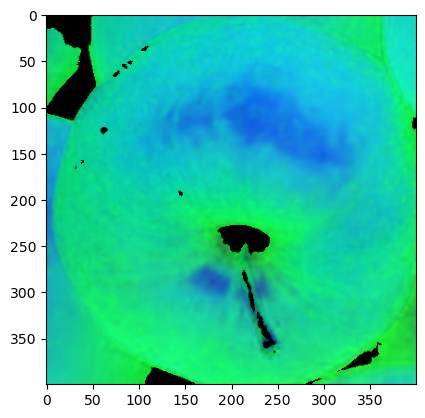

In [63]:
#Analysing the unknown image
un = cv2.imread('result/unknown/apple_unknown_8.jpg')
resized = cv2.resize(un, (400, 400))

blurred = cv2.GaussianBlur(resized, (5, 5), 0)

hsv_image = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv_image, (8, 50, 50), (90, 255, 255))

apple_region = cv2.bitwise_and(hsv_image, hsv_image, mask=mask)
mean_hsv = cv2.mean(apple_region, mask=mask)[:3]
print(mean_hsv)
plt.imshow(apple_region)

In [65]:
#Classify colors for all cropped images
os.makedirs('classified', exist_ok=True)
for idx, crop in enumerate(cropped_images):
    color = classify_color(crop)
    file_name = f'result/{color}/apple_{color}_{idx}.jpg'
    cv2.imwrite(file_name, crop)
    print(f"Cropped image apple_{idx} classified as {color}.")

Cropped image apple_0 classified as red.
Cropped image apple_1 classified as yellow.
Cropped image apple_2 classified as yellow.
Cropped image apple_3 classified as yellow.
Cropped image apple_4 classified as red.
Cropped image apple_5 classified as red.
Cropped image apple_6 classified as red.
Cropped image apple_7 classified as yellow.
Cropped image apple_8 classified as yellow.
Cropped image apple_9 classified as yellow.
Cropped image apple_10 classified as red.
Cropped image apple_11 classified as green.
Cropped image apple_12 classified as red.
Cropped image apple_13 classified as yellow.
Cropped image apple_14 classified as red.
Cropped image apple_15 classified as red.
Cropped image apple_16 classified as red.
Cropped image apple_17 classified as red.
Cropped image apple_18 classified as red.
Cropped image apple_19 classified as yellow.
Cropped image apple_20 classified as yellow.
Cropped image apple_21 classified as green.
Cropped image apple_22 classified as red.
Cropped image

In [6]:
#Getting file name
green_result = os.listdir('result/green/')
yellow_result = os.listdir('result/yellow/')
red_result = os.listdir('result/red/')

In [13]:
root = 'result'

GREEN APPLE SAMPLES


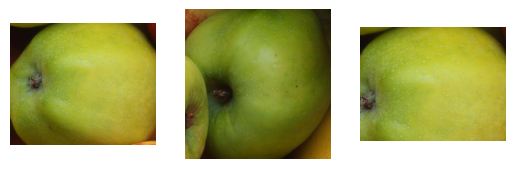

In [24]:
img,axs = plt.subplots(nrows=1, ncols=3)
for i in range(3):
    im = plt.imread(f'{root}/green/{green_result[i]}')
    axs[i].imshow(im)
    axs[i].axis('off')
print("GREEN APPLE SAMPLES")
plt.show()

YELLOW APPLE


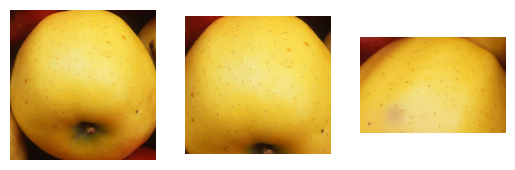

In [23]:
img,axs = plt.subplots(nrows=1, ncols=3)
for i in range(3):
    im = plt.imread(f'{root}/yellow/{yellow_result[i]}')
    axs[i].imshow(im)
    axs[i].axis('off')
print("YELLOW APPLE SAMPLES")
plt.show()

RED APPLE SAMPLES


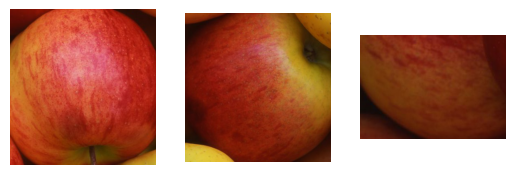

In [25]:
img,axs = plt.subplots(nrows=1, ncols=3)
for i in range(3):
    im = plt.imread(f'{root}/red/{red_result[i]}')
    axs[i].imshow(im)
    axs[i].axis('off')
print("RED APPLE SAMPLES")
plt.show()

# Conclusion

The model trained with 10 epochs and able to detect almost the apple in the sample image. Detected image then stored to array in which eventually get classified based on the Hue value in ```classify_color``` function.
I made a few experiment by just using raw Hue value without any preprocess in the first. It works, but I got alot of unclassified/unknown apple color, I felt like tweaking Hue threshold will never end, I tried to isolate the apple feature within spesific range. I still got unkown image but only a few adjustment needed.